In [117]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
demo_df = pd.read_csv('../Dataset/DEMO.csv')
pbcd_df = pd.read_csv('../Dataset/PBCD_I.csv')
rhq_df = pd.read_csv('../Dataset/RHQ_I.csv')
tst_df = pd.read_csv('../Dataset/TST_I.csv')
bmx_df = pd.read_csv('../Dataset/BMX_I.csv')
ihgem_df = pd.read_csv('../Dataset/IHGEM_I.csv')

for df in [demo_df, pbcd_df, rhq_df, tst_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)


In [119]:
columns_names = {
    'SEQN': 'Respondent sequence number', # [cite: 498, 500]
    'WTSH2YR': 'Blood metal weights', # [cite: 506]
    'LBXBPB': 'Blood lead (ug/dL)', # [cite: 512]
    'LBDBPBSI': 'Blood lead (umol/L)', # [cite: 519, 521]
    'LBDBPBLC': 'Blood lead comment code', # [cite: 525]
    'LBXBCD': 'Blood cadmium (ug/L)', # [cite: 527]
    'LBDBCDSI': 'Blood cadmium (umol/L)', # [cite: 529]
    'LBDBCDLC': 'Blood cadmium comment code', # [cite: 531]
    'LBXTHG': 'Blood mercury, total (ug/L)', # [cite: 533]
    'LBDTHGSI': 'Blood mercury, total (nmol/L)', # [cite: 535]
    'LBDTHGLC': 'Blood mercury, total comment code', # [cite: 537]
    'LBXBSE': 'Blood selenium (ug/L)', # [cite: 539]
    'LBDBSESI': 'Blood selenium (umol/L)', # [cite: 541]
    'LBDBSELC': 'Blood selenium comment code', # [cite: 543]
    'LBXBMN': 'Blood manganese (ug/L)', # [cite: 545]
    'LBDBMNSI': 'Blood manganese (umol/L)', # [cite: 547]
    'LBDBMNLC': 'Blood manganese comment code', # [cite: 549]
    'LBXTST': 'Testosterone, total (ng/dL)', # [cite: 680, 681]
    'LBDTSTLC': 'Testosterone comment code', # [cite: 689]
    'LBXEST': 'Estradiol (pg/mL)', # [cite: 695, 697]
    'LBDESTLC': 'Estradiol Comment Code', # [cite: 701]
    'LBXSHBG': 'Sex Hormone Binding Globulin (SHBG, nmol/L)', # [cite: 703]
    'LBDSHGLC': 'SHBG Comment Code', # [cite: 705]
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24 mos',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six month time period',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMQADFC': 'Served in a foreign country',
    'DMDBORN4': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHHSZA': '# of children 5 years or younger in HH',
    'DMDHHSZB': '# of children 6-17 years old in HH',
    'DMDHHSZE': '# of adults 60 years or older in HH',
    'DMDHRGND': "HH ref person's gender",
    'DMDHRAGE': "HH ref person's age in years",
    'DMDHRBR4': "HH ref person's country of birth",
    'DMDHREDU': "HH ref person's education level",
    'DMDHRMAR': "HH ref person's marital status",
    'DMDHSEDU': "HH ref person's spouse's education level",
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty',
    'RHQ010': 'Age when first menstrual period occurred',
    'RHQ020': 'Age range at first menstrual period',
    'RHQ031': 'Had regular periods in past 12 months',
    'RHD043': 'Reason not having regular periods',
    'RHQ060': 'Age at last menstrual period',
    'RHQ070': 'Age range at last menstrual period',
    'RHQ074': 'Tried for a year to become pregnant?',
    'RHQ076': 'Seen a DR b/c unable to become pregnant?',
    'RHQ078': 'Ever treated for a pelvic infection/PID?',
    'RHQ131': 'Ever been pregnant?',
    'RHD143': 'Are you pregnant now?',
    'RHQ160': 'How many times have been pregnant?',
    'RHQ162': 'During pregnancy, told you have diabetes',
    'RHQ163': 'Age told you had diabetes while pregnant',
    'RHQ166': 'How many vaginal deliveries?',
    'RHQ169': 'How many cesarean deliveries?',
    'RHQ172': 'Any babies weigh 9 lbs or more?',
    'RHD173': 'Age when delivered baby 9 lbs or more?',
    'RHQ171': 'How many deliveries live birth result?',
    'RHD180': 'Age at first live birth',
    'RHD190': 'Age at last live birth',
    'RHQ197': 'How many months ago have baby?',
    'RHQ200': 'Now breastfeeding a child?',
    'RHD280': 'Had a hysterectomy?',
    'RHQ291': 'Age when had hysterectomy',
    'RHQ305': 'Had both ovaries removed?',
    'RHQ332': 'Age when both ovaries removed',
    'RHQ420': 'Ever taken birth control pills?',
    'RHQ540': 'Ever use female hormones?',
    'RHQ542A': 'Hormone pills used',
    'RHQ542B': 'Hormone patches used',
    'RHQ542C': 'Hormone cream/suppository/injection used',
    'RHQ542D': 'Other form of female hormone used',
    'RHQ554': 'Use hormone pills w/estrogen only',
    'RHQ560Q': 'How long taking estrogen-only pills?',
    'RHQ560U': 'Unit of measure: months, years',
    'RHQ570': 'Used estrogen/progestin combo pills',
    'RHQ576Q': 'How long taking estrogen/progestin?',
    'RHQ576U': 'Unit of measure: months, years',
    'RHQ580': 'Used estrogen-only patches?',
    'RHQ586Q': 'How long using estrogen only patches?',
    'RHQ586U': 'Unit of measure: months, years',
    'RHQ596': 'Used estrogen/progestin combo patches?',
    'RHQ602Q': 'How long use estrogen/progestin patch',
    'RHQ602U': 'Unit of measure: months, years'
}


In [120]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_desc = {}

def print_desc():
    for key, value in df_desc.items():
        print(f"df_{key}: {value}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set(style="whitegrid", font_scale=1.1)

def plot_df(df, columns=None, plot_type='hist', target=None, hue=None, bins=30,
            clip_outliers=True, standardize=False, save_path=None,
            method='pearson', annot=True):
    """
    Enhanced plotting utility with heatmap support.

    Parameters:
    - df: pd.DataFrame
    - columns: list of str — column names to plot (1 or 2 depending on plot)
    - plot_type: str — 'hist', 'box', 'violin', 'scatter', 'pairplot', 'heatmap'
    - target: str — required for scatter plot
    - hue: str — optional group/categorical column
    - bins: int — histogram bin count
    - clip_outliers: bool — whether to remove outliers (1st–99th percentile)
    - standardize: bool — apply z-score normalization
    - save_path: str — if provided, saves plots to this directory
    - method: str — correlation method for heatmap ('pearson', 'spearman', 'kendall')
    - annot: bool — annotate heatmap cells with values
    """
    
    def _clip_series(series):
        if clip_outliers:
            lower, upper = series.quantile(0.01), series.quantile(0.99)
            return series.clip(lower, upper)
        return series

    def _standardize_series(series):
        return (series - series.mean()) / series.std() if standardize else series

    def _plot_and_save(fig, name):
        plt.tight_layout()
        if save_path:
            os.makedirs(save_path, exist_ok=True)
            fig_path = os.path.join(save_path, f"{name}_{plot_type}.png")
            plt.savefig(fig_path, dpi=300)
        plt.show()

    # HEATMAP
    if plot_type == 'heatmap':
        if columns is None:
            columns = df.select_dtypes(include=np.number).columns.tolist()

        corr_df = df[columns].copy()
        for col in columns:
            corr_df[col] = _clip_series(corr_df[col])
            corr_df[col] = _standardize_series(corr_df[col])

        corr = corr_df.corr(method=method)
        fig = plt.figure(figsize=(len(columns), len(columns)))
        sns.heatmap(corr, annot=annot, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'label': f'{method.capitalize()} Correlation'})
        plt.title(f'{method.capitalize()} Correlation Heatmap')
        _plot_and_save(fig, "correlation")

        return  # early return

    # OTHER PLOTS
    if plot_type == 'hist':
        for col in columns:
            series = df[col].dropna()
            series = _clip_series(series)
            series = _standardize_series(series)

            fig = plt.figure(figsize=(8, 4))
            if hue is not None and hue in df.columns:
                # Align hue values with the filtered series index
                hue_series = df.loc[series.index, hue]
                sns.histplot(
                    x=series,
                    hue=hue_series,
                    bins=bins,
                    kde=True,
                    palette="Set2"
                )
            else:
                sns.histplot(series, bins=bins, kde=True)

            plt.title(f'Histogram of {col}')
            plt.xlabel(f'{col} {"(z-score)" if standardize else ""}')
            plt.ylabel('Count')
            _plot_and_save(fig, col)

    elif plot_type == 'box':
        for col in columns:
            fig = plt.figure(figsize=(8, 4))
            temp_df = df[[col] + ([hue] if hue else [])].dropna()
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])

            sns.boxplot(data=temp_df, x=hue, y=col) if hue else sns.boxplot(y=temp_df[col])
            plt.title(f'Box Plot of {col}')
            _plot_and_save(fig, col)

    elif plot_type == 'violin':
        for col in columns:
            fig = plt.figure(figsize=(8, 4))
            temp_df = df[[col] + ([hue] if hue else [])].dropna()
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])

            sns.violinplot(data=temp_df, x=hue, y=col) if hue else sns.violinplot(y=temp_df[col])
            plt.title(f'Violin Plot of {col}')
            _plot_and_save(fig, col)

    elif plot_type == 'scatter':
        if len(columns) != 1 or target is None:
            print("Error: For scatter, pass one feature column in `columns` and a target in `target`.")
            return
        x = df[columns[0]]
        y = df[target]
        temp_df = df[[columns[0], target] + ([hue] if hue else [])].dropna()
        temp_df[columns[0]] = _clip_series(temp_df[columns[0]])
        temp_df[target] = _clip_series(temp_df[target])

        fig = plt.figure(figsize=(8, 6))
        sns.scatterplot(data=temp_df, x=columns[0], y=target, hue=hue, alpha=0.7, edgecolor=None)
        plt.title(f'{columns[0]} vs {target}')
        _plot_and_save(fig, f"{columns[0]}_vs_{target}")

    elif plot_type == 'pairplot':
        if len(columns) < 2:
            print("Error: Pairplot needs at least 2 columns.")
            return
        cols = columns + ([hue] if hue else [])
        temp_df = df[cols].dropna()
        for col in columns:
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])
        sns.pairplot(temp_df, hue=hue)
        if save_path:
            plt.savefig(os.path.join(save_path, "pairplot.png"), dpi=300)
        plt.show()

    else:
        print(f"Unsupported plot_type: {plot_type}. Use 'hist', 'box', 'violin', 'scatter', 'pairplot', or 'heatmap'.")

def get_columns_with_missing_data(df, threshold=0.4):
    missing_ratio = df.isnull().mean()
    cols_above_threshold = missing_ratio[missing_ratio > threshold]
    return cols_above_threshold.sort_values(ascending=False)

def get_columns_with_missing_values(df, threshold=0.5):
    missing_ratio = df.isnull().mean()
    # Filter column names with missing ratio > threshold
    cols = missing_ratio[missing_ratio > threshold].index.tolist()
    return cols


import os

def save_df_to_csv(df, name, directory='csvs'):
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)
    # Build full file path
    file_path = os.path.join(directory, f"{name}.csv")
    # Save to CSV
    df.to_csv(file_path, index=False)
    print(f"✅ DataFrame saved to: {file_path}")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def plot_feature_importance(
    df, 
    target_col, 
    drop_cols=None, 
    model_type='regression', 
    test_size=0.2, 
    random_state=42, 
    top_n=15
):
    """
    Train a Random Forest model and plot top N feature importances.

    Parameters:
    - df: pandas DataFrame
    - target_col: column name to predict
    - drop_cols: list of columns to exclude from features (e.g. ID or other targets)
    - model_type: 'regression' or 'classification'
    - test_size: fraction of data for test split
    - random_state: random seed for reproducibility
    - top_n: number of top features to plot
    """

    if drop_cols is None:
        drop_cols = []

    global top_features
    top_features = []

    # Prepare X and y
    features = df.drop([target_col] + drop_cols, axis=1)
    target = df[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )

    # Choose model
    if model_type == 'regression':
        model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    elif model_type == 'classification':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    else:
        raise ValueError("model_type must be 'regression' or 'classification'")

    # Fit model
    model.fit(X_train, y_train)

    # Feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    if top_n > len(indices):
        top_n = len(indices)
    
    # Limit to top_n features
    top_indices = indices[:top_n]
    top_features = [features.columns[i] for i in top_indices]
    top_importances = importances[top_indices]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Top {top_n} Feature Importances - Target: {target_col}")
    plt.bar(range(top_n), top_importances, align="center")
    plt.xticks(range(top_n), top_features, rotation=90)
    plt.tight_layout()
    plt.show()

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import HuberRegressor

def preprocess_and_model(df, target_col, drop_cols=None, test_size=0.2, random_state=42, top_features=60):
    """
    df: input dataframe with target column included
    target_col: name of the target column as string
    drop_cols: list of column names to drop before modeling
    test_size: fraction for test split
    random_state: for reproducibility
    top_features: number of features to select with RandomForest

    Returns dictionary with performance metrics and best params of models
    """
    df = df.copy()

    # Drop ignored columns
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identify columns by data type and unique values
    yes_no_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({'yes', 'no', 'Yes', 'No', 'YES', 'NO'})]
    cat_cols_oh = [col for col in X.columns if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object']
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    # Imputers
    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    # Process Yes/No columns
    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    # Process categorical columns (<5 unique, excluding yes/no)
    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    # High-cardinality numeric (scale)
    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    # Low-cardinality numeric (no scale)
    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # Combine processed data
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)

    # Feature selection using RandomForest
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # Models
    xgb = XGBRegressor(random_state=random_state, objective='reg:squarederror', eval_metric='mae')
    huber = HuberRegressor()

    xgb_param_grid = {'n_estimators': [50,100, 500, 1000], 'max_depth': [3, 5, 7, 12], 'learning_rate': [0.05, 0.1, 0.001, 0.01]}
    huber_param_grid = {'epsilon': [1.1, 1.35, 1.5], 'alpha': [0.0001, 0.001, 0.01]}

    xgb_gs = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    huber_gs = GridSearchCV(huber, huber_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

    xgb_gs.fit(X_train_sel, y_train)
    huber_gs.fit(X_train_sel, y_train)

    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    results = {
        'XGBoost Regressor': {'Best Params': xgb_gs.best_params_, 'Performance': evaluate_model(xgb_gs.best_estimator_, X_test_sel, y_test)},
        'Huber Regressor': {'Best Params': huber_gs.best_params_, 'Performance': evaluate_model(huber_gs.best_estimator_, X_test_sel, y_test)},
        'Selected Features': [f'{feature} : {columns_names[feature]}' for feature in top_feats],
        #'Selected Features': top_feats,
    }

    return results


# Global results tracker
global_results_df = pd.DataFrame(columns=["Model", "Best Params", "MAE", "MSE", "RMSE", "R2", "Selected Features"])

def preprocess_and_model(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60
):
    """
    df: DataFrame with target
    target_col: target column name
    model: scikit-learn compatible model (e.g. XGBRegressor())
    param_grid: dict for GridSearchCV
    drop_cols: list of columns to drop before processing
    """
    global global_results_df  # so we can append results

    df = df.copy()

    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Detect column types
    yes_no_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})]
    cat_cols_oh = [col for col in X.columns if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object']
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    # Process Yes/No
    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    # Process categorical
    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    # High-card numeric
    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    # Low-card numeric
    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # Merge all
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)

    # Feature selection
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # GridSearch on given model
    gs = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

    # Create current results row
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats
    }])

    # Append to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    return current_result

import shap
import matplotlib.pyplot as plt
import os

# Folder to save SHAP plots
shap_output_dir = "shap_outputs"
os.makedirs(shap_output_dir, exist_ok=True)

# def preprocess_and_model_shap(
#     df,
#     target_col,
#     model,
#     param_grid,
#     drop_cols=None,
#     test_size=0.2,
#     random_state=42,
#     top_features=60,
#     run_shap=True
# ):
#     global global_results_df

#     df = df.copy()

#     if drop_cols:
#         drop_existing = [c for c in drop_cols if c in df.columns]
#         df.drop(columns=drop_existing, inplace=True)

#     X = df.drop(columns=[target_col])
#     y = df[target_col]

#     yes_no_cols = [
#         col for col in X.columns
#         if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})
#     ]
#     cat_cols_oh = [
#         col for col in X.columns
#         if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object'
#     ]
#     numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
#     high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
#     low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

#     yes_no_imputer = SimpleImputer(strategy='most_frequent')
#     cat_imputer = SimpleImputer(strategy='most_frequent')
#     num_imputer = SimpleImputer(strategy='most_frequent')

#     if yes_no_cols:
#         X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
#         X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
#         for col in yes_no_cols:
#             X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
#     else:
#         X_yes_no = pd.DataFrame()

#     if cat_cols_oh:
#         X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
#         X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
#         ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#         X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
#     else:
#         X_cat_ohe = pd.DataFrame()

#     if high_card_cols:
#         X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
#         scaler = MinMaxScaler()
#         X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
#     else:
#         X_high_card = pd.DataFrame()

#     if low_card_num_cols:
#         X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
#         X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
#     else:
#         X_low_card_num = pd.DataFrame()

#     X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

#     X_train, X_test, y_train, y_test = train_test_split(
#         X_processed, y, test_size=test_size, random_state=random_state
#     )

#     rf = RandomForestRegressor(random_state=random_state)
#     rf.fit(X_train, y_train)
#     importances = pd.Series(rf.feature_importances_, index=X_train.columns)
#     top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

#     X_train_sel = X_train[top_feats]
#     X_test_sel = X_test[top_feats]

#     gs = GridSearchCV(model, param_grid, cv=3,
#                       scoring='neg_mean_absolute_error', n_jobs=-1)
#     gs.fit(X_train_sel, y_train)

#     def evaluate_model(model, X_test, y_test):
#         y_pred = model.predict(X_test)
#         return {
#             'MAE': mean_absolute_error(y_test, y_pred),
#             'MSE': mean_squared_error(y_test, y_pred),
#             'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
#             'R2': r2_score(y_test, y_pred)
#         }

#     eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

#     current_result = pd.DataFrame([{
#         "Model": model.__class__.__name__,
#         "Best Params": gs.best_params_,
#         "MAE": eval_results["MAE"],
#         "MSE": eval_results["MSE"],
#         "RMSE": eval_results["RMSE"],
#         "R2": eval_results["R2"],
#         "Selected Features": top_feats
#     }])

#     global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

#     # ---------- SHAP Analysis ----------
#     if run_shap:
#         explainer = shap.Explainer(gs.best_estimator_, X_train_sel)
#         shap_values = explainer(X_test_sel)

#         # Summary plot (global feature importance)
#         plt.figure()
#         shap.summary_plot(shap_values, X_test_sel, show=False)
#         plt.tight_layout()
#         plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_summary.png"))
#         plt.close()

#         # Bar plot
#         plt.figure()
#         shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
#         plt.tight_layout()
#         plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_bar.png"))
#         plt.close()

#         # Example individual prediction waterfall
#         shap.plots.waterfall(shap_values[0], show=False)
#         plt.tight_layout()
#         plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_waterfall.png"))
#         plt.close()

#     return current_result, gs.best_estimator_, X_test_sel, top_feats, shap_values

def preprocess_and_model_shap(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    run_shap=True,
    external_results_path="all_results.csv"
):
    global global_results_df

    df = df.copy()

    # Drop unwanted columns if present
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # Split features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # ---------------- Data preprocessing ----------------
    yes_no_cols = [
        col for col in X.columns
        if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})
    ]
    cat_cols_oh = [
        col for col in X.columns
        if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object'
    ]
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # ---------------- Train-test split ----------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=test_size, random_state=random_state
    )

    # ---------------- Feature selection via RF ----------------
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # ---------------- Model training with GridSearch ----------------
    gs = GridSearchCV(model, param_grid, cv=3,
                      scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    # ---------------- Evaluation ----------------
    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

    # Current result row
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats,
        "Target Variable": target_col
    }])

    # Add to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    # ---------------- External results persistence ----------------
    if os.path.exists(external_results_path):
        external_results = pd.read_csv(external_results_path)
        external_results = pd.concat([external_results, current_result], ignore_index=True)
    else:
        external_results = current_result

    external_results.to_csv(external_results_path, index=False)

    # ---------------- SHAP Analysis ----------------
    shap_values = None
    if run_shap:
        explainer = shap.Explainer(gs.best_estimator_, X_train_sel)
        shap_values = explainer(X_test_sel,check_additivity=False)

        # Summary plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_summary.png"))
        plt.close()

        # Bar plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_bar.png"))
        plt.close()

        # Example waterfall
        shap.plots.waterfall(shap_values[0], show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_waterfall.png"))
        plt.close()

    # ---------------- Return structured outputs ----------------
    results_dict = {
        "best_model": gs.best_estimator_,
        "best_params": gs.best_params_,
        "eval_results": eval_results,
        "X_train": X_train_sel,
        "X_test": X_test_sel,
        "y_train": y_train,
        "y_test": y_test,
        "selected_features": top_feats,
        "shap_values": shap_values
    }

    return current_result, results_dict


import os
import joblib
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# global results dataframe
global_results_df = pd.DataFrame()

# ensure shap output directory exists
shap_output_dir = "shap_outputs"
os.makedirs(shap_output_dir, exist_ok=True)

def preprocess_and_model_shap_save(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    run_shap=True,
    external_results_path="all_results.csv",
    save_model=False,                      
    model_path="best_model.joblib"
):
    global global_results_df

    df = df.copy()

    # ---------------- Drop unwanted columns ----------------
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # ---------------- Split features and target ----------------
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # ---------------- Data preprocessing ----------------
    yes_no_cols = [
        col for col in X.columns
        if set(X[col].dropna().unique()).issubset({'yes','no','Yes','No','YES','NO'})
    ]
    cat_cols_oh = [
        col for col in X.columns
        if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object'
    ]
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # combine all processed parts
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)


    preprocessing_objects = {
    "yes_no_imputer": yes_no_imputer if yes_no_cols else None,
    "cat_imputer": cat_imputer if cat_cols_oh else None,
    "ohe": ohe if cat_cols_oh else None,
    "num_imputer": num_imputer,
    "scaler_high_card": scaler if high_card_cols else None
    }

    # ---------------- Train-test split ----------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=test_size, random_state=random_state
    )

    # ---------------- Feature selection via RandomForest ----------------
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # ---------------- Model training with GridSearch ----------------
    gs = GridSearchCV(model, param_grid, cv=3,
                      scoring='neg_mean_absolute_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    # ---------------- Evaluation ----------------
    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

    # ---------------- Save best model if requested ----------------
    if save_model:
        os.makedirs(os.path.dirname(model_path), exist_ok=True)  # 👈 create path if missing
        joblib.dump(gs.best_estimator_, model_path)
        print(f"✅ Best model saved to {model_path}")


    # ---------------- Current result row ----------------
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats,
        "Target Variable": target_col
    }])

    # Add to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    # ---------------- External results persistence ----------------
    if os.path.exists(external_results_path):
        external_results = pd.read_csv(external_results_path)
        external_results = pd.concat([external_results, current_result], ignore_index=True)
    else:
        external_results = current_result

    external_results.to_csv(external_results_path, index=False)

    # ---------------- SHAP Analysis ----------------
    shap_values = None
    if run_shap:
        explainer = shap.Explainer(gs.best_estimator_, X_train_sel)
        shap_values = explainer(X_test_sel)

        # Summary plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_summary.png"))
        plt.close()

        # Bar plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_bar.png"))
        plt.close()

        # Example waterfall
        shap.plots.waterfall(shap_values[0], show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_waterfall.png"))
        plt.close()

    # ---------------- Return structured outputs ----------------
    results_dict = {
        "best_model": gs.best_estimator_,
        "best_params": gs.best_params_,
        "eval_results": eval_results,
        "X_train": X_train_sel,
        "X_test": X_test_sel,
        "y_train": y_train,
        "y_test": y_test,
        "selected_features": top_feats,
        "shap_values": shap_values,
        "preprocessing_objects": preprocessing_objects 
    }

    return current_result, results_dict

def preprocess_and_model_shap_save_2(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    run_shap=True,
    external_results_path="all_results.csv",
    save_model=False,
    model_path="best_model.joblib",
    shap_output_dir="shap_outputs"
):
    global global_results_df

    df = df.copy()

    # ---------------- Drop unwanted columns ----------------
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # ---------------- Split features and target ----------------
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # ---------------- Data preprocessing (Simple Mode Imputation Only) ----------------
    imputer = SimpleImputer(strategy="most_frequent")
    X_processed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    preprocessing_objects = {"imputer": imputer}

    # ---------------- Train-test split ----------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=test_size, random_state=random_state
    )

    # ---------------- Feature selection via RandomForest ----------------
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # ---------------- Model training with GridSearch ----------------
    gs = GridSearchCV(
        model,
        param_grid,
        cv=3,
        scoring="neg_mean_absolute_error",
        n_jobs=-1
    )
    gs.fit(X_train_sel, y_train)

    # ---------------- Evaluation ----------------
    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred),
        }

    eval_results = evaluate_model(gs.best_estimator_, X_test_sel, y_test)

    # ---------------- Save best model if requested ----------------
    if save_model:
        os.makedirs(os.path.dirname(model_path), exist_ok=True)
        joblib.dump(gs.best_estimator_, model_path)
        print(f"✅ Best model saved to {model_path}")

    # ---------------- Current result row ----------------
    current_result = pd.DataFrame([{
        "Model": model.__class__.__name__,
        "Best Params": gs.best_params_,
        "MAE": eval_results["MAE"],
        "MSE": eval_results["MSE"],
        "RMSE": eval_results["RMSE"],
        "R2": eval_results["R2"],
        "Selected Features": top_feats,
        "Target Variable": target_col,
    }])

    # Add to global results
    global_results_df = pd.concat([global_results_df, current_result], ignore_index=True)

    # ---------------- External results persistence ----------------
    if os.path.exists(external_results_path):
        external_results = pd.read_csv(external_results_path)
        external_results = pd.concat([external_results, current_result], ignore_index=True)
    else:
        external_results = current_result

    external_results.to_csv(external_results_path, index=False)

    # ---------------- SHAP Analysis ----------------
    shap_values = None
    if run_shap:
        os.makedirs(shap_output_dir, exist_ok=True)
        explainer = shap.Explainer(gs.best_estimator_, X_train_sel)
        shap_values = explainer(X_test_sel)

        # Summary plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_summary.png"))
        plt.close()

        # Bar plot
        plt.figure()
        shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_bar.png"))
        plt.close()

        # Example waterfall
        shap.plots.waterfall(shap_values[0], show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(shap_output_dir, f"{model.__class__.__name__}_waterfall.png"))
        plt.close()

    # ---------------- Return structured outputs ----------------
    results_dict = {
        "best_model": gs.best_estimator_,
        "best_params": gs.best_params_,
        "eval_results": eval_results,
        "X_train": X_train_sel,
        "X_test": X_test_sel,
        "y_train": y_train,
        "y_test": y_test,
        "selected_features": top_feats,
        "shap_values": shap_values,
        "preprocessing_objects": preprocessing_objects,
    }

    return current_result, results_dict


In [121]:
df_1 = demo_df.copy()
df_1 = df_1.merge(tst_df, on='SEQN', how='right')
df_desc[1] = "demo and tst merged"

df_2 = demo_df.copy()
df_2 = df_2.merge(pbcd_df, on='SEQN', how='right')
df_desc[2] = "demo and pbcd merged"

df_3 = demo_df.copy()
df_3 = df_3.merge(rhq_df, on='SEQN', how='right')
df_desc[3] = "demo and rhq merged"

df_4 = df_1.copy()
df_4 = df_4.merge(pbcd_df, on='SEQN', how='left')
df_desc[4] = "demo and rhq merged + pbcd left merged"

df_5 = df_4.copy()
df_5 = df_5.merge(rhq_df, on='SEQN', how='left')
df_desc[5] = "all mergerd for demo, tst, pbcd, rhq order"

### Cleaning

In [122]:
import re

def apply_skip_patterns(df, skip_rules):
    df = df.copy()
    
    # Identify RHQ/RHD columns in order
    rhq_cols = [col for col in df.columns if re.match(r'^RH[QD]\d{3}[A-Z]*$', col)]
    rhq_col_positions = {col: idx for idx, col in enumerate(rhq_cols)}
    
    pass_id = 1

    for trigger_col, skip_map in skip_rules.items():
        for trigger_val, skip_to in skip_map.items():
            if trigger_col not in rhq_col_positions:
                continue

            start_idx = rhq_col_positions[trigger_col]
            mask = df[trigger_col] == trigger_val

            # Determine skip range
            if skip_to == "END":
                skipped_cols = rhq_cols[start_idx + 1:]
            else:
                if skip_to not in rhq_col_positions:
                    continue
                end_idx = rhq_col_positions[skip_to]
                if end_idx <= start_idx:
                    continue
                skipped_cols = rhq_cols[start_idx + 1:end_idx]
            
            # Fill NaNs with pass_k in skipped columns
            for col in skipped_cols:
                df[col] = df[col].astype('object')  # Ensure column can hold strings
                df.loc[mask & df[col].isna(), col] = f"pass_{pass_id}"

            
            pass_id += 1
    
    return df


In [123]:
skip_rules = {
    "RHQ010": {
        0: "END"  
    },
    "RHQ031": {
        1: "RHQ060",  
        7: "RHQ060",  
        9: "RHQ060"   
    },
    "RHQ131": {
        2: "RHD280",  
        7: "RHD280",  
        9: "RHD280"   
    },
    
    "RHQ162": {
        2: "RHQ166",
        3: "RHQ166",
        7: "RHQ166",  
        9: "RHQ166"   
    },
    "RHQ172": {
        2: "RHQ171",  
        7: "RHQ171",  
        9: "RHQ171"
    },
    "RHD280": {
        2: "RHQ305",  
        7: "RHQ305",  
        9: "RHQ305"
    },
    "RHQ305": {
        2: "RHQ420",  
        7: "RHQ420",  
        9: "RHQ420"   
    },
    "RHQ540": {
        2: "END", 
        7: "END", 
        9: "END"  
    },
    "RHQ554": {
        2: "RHQ570", 
        7: "RHQ570", 
        9: "RHQ570"  
    },
    "RHQ570": {
        2: "RHQ580",  
        7: "RHQ580",  
        9: "RHQ580" 
    },
    "RHQ580": {
        2: "RHQ596",  
        7: "RHQ596",
        9: "RHQ596"   
    },
    "RHQ596": {
        2: "END",  
        7: "END",
        9: "END"   
    }
}

In [124]:
df_6 = rhq_df.copy()
df_6 = apply_skip_patterns(df_6, skip_rules)
df_desc[6] = "Applied skip patterns to RHQ/RHD columns"

In [125]:
import re

def apply_skip_patterns_numeric(df, skip_rules, pass_start=500):
    df = df.copy()
    
    # Identify RHQ/RHD columns in order
    rhq_cols = [col for col in df.columns if re.match(r'^RH[QD]\d{3}[A-Z]*$', col)]
    rhq_col_positions = {col: idx for idx, col in enumerate(rhq_cols)}
    
    pass_id = 1
    pass_map = {}  # Store pass_k -> numeric value mapping

    for trigger_col, skip_map in skip_rules.items():
        for trigger_val, skip_to in skip_map.items():
            if trigger_col not in rhq_col_positions:
                continue

            start_idx = rhq_col_positions[trigger_col]
            mask = df[trigger_col] == trigger_val

            # Determine skip range
            if skip_to == "END":
                skipped_cols = rhq_cols[start_idx + 1:]
            else:
                if skip_to not in rhq_col_positions:
                    continue
                end_idx = rhq_col_positions[skip_to]
                if end_idx <= start_idx:
                    continue
                skipped_cols = rhq_cols[start_idx + 1:end_idx]
            
            # Generate numeric pass value
            pass_label = f"pass_{pass_id}"
            pass_numeric = pass_start + pass_id - 1
            pass_map[pass_label] = pass_numeric

            # Apply to relevant columns
            for col in skipped_cols:
                df.loc[mask & df[col].isna(), col] = pass_label
            
            pass_id += 1

    # Final step: replace all pass_k with numeric codes
    df.replace(pass_map, inplace=True)
    df = df.infer_objects(copy=False)

    return df

In [126]:
df_7 = df_6.copy()
df_7 = apply_skip_patterns_numeric(df_7, skip_rules)
df_desc[7] = "Applied numeric skip patterns to RHQ/RHD columns"

C:\Users\USER\AppData\Local\Temp\ipykernel_21968\994487393.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(pass_map, inplace=True)


In [127]:
def mark_male_nans(df, rhq_prefixes=('RHQ', 'RHD'), male_code=300):
    df = df.copy()
    
    # Identify RHQ/RHD columns
    rhq_cols = [col for col in df.columns if any(col.startswith(prefix) for prefix in rhq_prefixes)]
    
    # Mask: rows where gender is male (RIAGENDR == 1)
    male_mask = df['RIAGENDR'] == 1
    
    # Replace NaNs in RHQ columns for male rows with the code
    for col in rhq_cols:
        df.loc[male_mask & df[col].isna(), col] = male_code

    return df


### CLEANING DEMO DATA

In [128]:
df_8 = demo_df.copy()
df_desc[8] = "demo_df copy for df_8"

In [129]:
def fix_demo_advanced(df):
    df = df.copy()

    # Precompute age and gender filters
    age = df['RIDAGEYR']
    is_male = df['RIAGENDR'] == 1
    is_female = df['RIAGENDR'] == 2

    # ----------------------------
    # RIDAGEMN: Only valid for age ≤ 2, others get age in months
    # ----------------------------
    df['RIDAGEMN'] = df.apply(
        lambda row: row['RIDAGEMN'] if row['RIDAGEYR'] <= 2 else row['RIDAGEYR'] * 12,
        axis=1
    )

    # ----------------------------
    # Combine DMDEDUC3 (6–19) and DMDEDUC2 (20+) into a unified education level column
    # ----------------------------
    df['COMBINED_EDUC'] = df['DMDEDUC3']
    # Fill missing values in DMDEDUC3 using 300+DMDEDUC2
    mask = df['COMBINED_EDUC'].isna() & df['DMDEDUC2'].notna()
    df.loc[mask, 'COMBINED_EDUC'] = df.loc[mask, 'DMDEDUC2'] + 300

    # ----------------------------
    # DMQMILIZ / DMQADFC: Military service — valid if age ≥ 17
    # ----------------------------
    df.loc[age < 17, ['DMQMILIZ', 'DMQADFC']] = 300

    # ----------------------------
    # DMDEDUC3: Children 6–19 only
    # ----------------------------
    df.loc[(age < 6) | (age > 19), 'DMDEDUC3'] = 300

    # ----------------------------
    # DMDEDUC2: Adults 20+ only
    # ----------------------------
    df.loc[age < 20, 'DMDEDUC2'] = 300

    # ----------------------------
    # DMDMARTL: Marital status — only for 16+ (modified)
    # ----------------------------
    df.loc[age < 16, 'DMDMARTL'] = 300

    # ----------------------------
    # RIDEXPRG: Pregnancy test – only for females age 20–44
    # ----------------------------
    df.loc[is_male, 'RIDEXPRG'] = 300
    df.loc[is_female & (age < 20), 'RIDEXPRG'] = 202
    df.loc[is_female & (age > 44), 'RIDEXPRG'] = 203

    # ----------------------------
    # MEC interview — age ≥ 8
    # ----------------------------
    df.loc[age < 8, ['MIALANG', 'MIAPROXY', 'MIAINTRP']] = 300

    # ----------------------------
    # ACASI Interview: age 8–69
    # ----------------------------
    df.loc[(age < 8) | (age > 69), 'AIALANGA'] = 300

    # ----------------------------
    # SP Interview Language and Proxy: skip if age < 1
    # ----------------------------
    df.loc[age < 1, ['SIALANG', 'SIAPROXY', 'SIAINTRP']] = 300
    df.loc[age < 1, ['FIALANG', 'FIAPROXY', 'FIAINTRP']] = 300

    # ----------------------------
    # DMDHSEDU (Spouse’s education): only if married (DMDMARTL == 1)
    # ----------------------------
    df.loc[df['DMDMARTL'] != 1, 'DMDHSEDU'] = 300

    # ----------------------------
    # Household reference fields: assign 300 if missing
    # ----------------------------
    hh_ref_cols = ['DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR']
    for col in hh_ref_cols:
        df.loc[df[col].isna(), col] = 300

    # ----------------------------
    # Impute DMDYRSUS using DMDCITZN, DMDBORN4, and RIDAGEYR
    # ----------------------------
    def age_to_dmdyrsus(years):
        if pd.isna(years): return np.nan
        if years < 1: return 1
        elif years < 5: return 2
        elif years < 10: return 3
        elif years < 15: return 4
        elif years < 20: return 5
        elif years < 30: return 6
        elif years < 40: return 7
        elif years < 50: return 8
        else: return 9

    mask_na = df['DMDYRSUS'].isna()
    born_us = df['DMDBORN4'] == 1
    not_born_us = df['DMDBORN4'] == 2
    citizen = df['DMDCITZN'] == 1
    non_citizen = df['DMDCITZN'] == 2

    # Case 1: Born in US → years in US = age
    born_us_mask = mask_na & born_us
    df.loc[born_us_mask, 'DMDYRSUS'] = age[born_us_mask].apply(age_to_dmdyrsus)

    # Case 2: Not born in US but citizen → assume arrived at 5 y/o
    citizen_nonborn = mask_na & citizen & not_born_us
    df.loc[citizen_nonborn, 'DMDYRSUS'] = (age[citizen_nonborn] - 5).clip(lower=0).apply(age_to_dmdyrsus)

    # Case 3: Not a citizen → assume recent arrival
    noncitizen_mask = mask_na & non_citizen
    df.loc[noncitizen_mask, 'DMDYRSUS'] = (age[noncitizen_mask] - 5).clip(lower=0).apply(age_to_dmdyrsus)

    return df


In [130]:
df_8 = fix_demo_advanced(df_8)
df_desc[8] = "Fixed demo_df advanced issues"

In [131]:
import pandas as pd

def normalize_codes_by_lists(df, list_777_999=None, list_77_99=None, list_7_9=None):
    df = df.copy()
    
    list_777_999 = list_777_999 or []
    list_77_99 = list_77_99 or []
    list_7_9 = list_7_9 or []
    
    # Rule 1: Replace 999 with 777
    for col in list_777_999:
        if col in df.columns:
            df[col] = df[col].replace({999: 777})
    
    # Rule 2: Replace 99 with 77
    for col in list_77_99:
        if col in df.columns:
            df[col] = df[col].replace({99: 77})
    
    # Rule 3: Replace 9 with 7
    for col in list_7_9:
        if col in df.columns:
            df[col] = df[col].replace({9: 7})
    
    return df

In [132]:
a1 = []
a2 = ['DMDBORN4','DMDYRSUS','DMDEDUC3','DMDMARTL','DMDHRBR4','DMDHRMAR','INDHHIN2','INDFMIN2']
a3 = ['DMQMILIZ','DMQADFC','DMDCITZN','DMDEDUC2','DMDHREDU','DMDHSEDU']

b1 = ['RHQ010','RHQ060','RHQ163','RHD173','RHD180','RHD190','RHQ197','RHQ291','RHQ332']
b2 = ['RHD043','RHQ070','RHQ160','RHQ166','RHQ169','RHQ171','RHQ542A','RHQ560Q','RHQ576Q','RHQ586Q','RHQ602Q']
b3 = ['RHQ020','RHQ031','RHQ074','RHQ076','RHQ078','RHQ131','RHD143','RHQ162','RHQ172','RHQ200','RHD280','RHQ305','RHQ420','RHQ540','RHQ554','RHQ560U','RHQ570','RHQ576U','RHQ580','RHQ586U','RHQ596','RHQ602U']

In [133]:
df_9 = df_7.copy()
df_10 = df_8.copy()

df_9 = normalize_codes_by_lists(
    df_9,
    list_777_999=b1,
    list_77_99=b2,
    list_7_9=b3
)

df_10 = normalize_codes_by_lists(
    df_10,
    list_777_999=a1,
    list_77_99=a2,
    list_7_9=a3
)

df_desc[9] = "Normalized codes in rhq"
df_desc[10] = "Normalized codes in demo"

In [134]:
df_11 = df_10.copy()
df_11 = df_11.merge(pbcd_df, on='SEQN', how='right')
df_11 = df_11.merge(tst_df, on='SEQN', how='left')
df_11 = df_11.merge(df_9, on='SEQN', how='left')
df_11.shape

(5815, 115)

In [135]:
df_11["AgeGroup_Years"] = pd.cut(
    df_11["RIDAGEYR"],
    bins=[-1, 12, 19, 29, 39, 49, 59, float("inf")],
    labels=[
        "0-12 (Child)",
        "13-19 (Teen)",
        "20-29 (Young Adult)",
        "30-39",
        "40-49",
        "50-59",
        "60+"
    ]
)


# Bucket by months (same cutoffs but in months)
df_11["AgeGroup_Months"] = pd.cut(
    df_11["RIDAGEMN"],
    bins=[-1, 239, 540, float("inf")],
    labels=["Under 20y", "20-45y", "Above 45y"]
)

In [136]:
df_11['LBXEST'].notnull().sum()

4059

In [137]:
df_11 = mark_male_nans(df_11,male_code=-1)

In [138]:
df_11_2 = df_11.copy()
df_11_2 = df_11.merge(bmx_df, on='SEQN', how='left')
df_desc[11.2] = "all merged for demo, tst, pbcd, rhq, bmx order"

In [139]:
df_11_3 = df_11_2.merge(ihgem_df, on='SEQN', how='left')
df_desc[11.3] = "all merged for demo, tst, pbcd, rhq, bmx, umi order"

In [140]:
df_11_2.loc[(df_11_2["RIDAGEMN"] < 12 * 20) & (df_11_2["RHQ131"].isna()), "RHQ131"] = 3

In [141]:
thresholds = [0.1, 0.2, 0.3, 0.5 ,1 ,50,100,200, 300, 400, 500,600,700, 800, 1000,1200, 1400, 1600, 2000, 3000, 4000, 6000, 7000, 8000, 9000, 11000, 12000, 13000, 14000, 15000]

# count how many values are above each threshold for each column
outlier_counts = {}
for col in ['LBXEST', 'LBXTST','LBXSHBG']:
    outlier_counts[col] = {thr: (df_11_2[col] > thr).sum() for thr in thresholds}

outlier_counts_df = pd.DataFrame(outlier_counts)
print("Outlier counts above thresholds:")
print(outlier_counts_df)

Outlier counts above thresholds:
         LBXEST  LBXTST  LBXSHBG
0.1        4059    4090     3937
0.2        4059    4090     3937
0.3        4059    4090     3937
0.5        4059    4090     3937
1.0        4059    4046     3937
50.0        651    1629     2095
100.0       370    1539      719
200.0       129    1414       53
300.0        59    1120       24
400.0        34     712       11
500.0        20     420        8
600.0        15     218        3
700.0        15     106        2
800.0        14      53        1
1000.0       12      12        0
1200.0       12       5        0
1400.0       11       2        0
1600.0       10       2        0
2000.0       10       0        0
3000.0        6       0        0
4000.0        5       0        0
6000.0        4       0        0
7000.0        4       0        0
8000.0        3       0        0
9000.0        3       0        0
11000.0       1       0        0
12000.0       1       0        0
13000.0       0       0        0
14000.0   

In [142]:
thresholds = [0.1, 0.2, 0.3, 0.5 ,1,2,4,6,10,20,50,75,100,150,200, 300, 400, 500,520,540,575,600,625,650,700, 800, 1000,1300, 2000, 3000, 4000, 6000, 7000, ]
metal_cols = ['LBDBPBSI', 'LBDBCDSI', 'LBDTHGSI', 'LBDBSESI', 'LBDBMNSI']

# count how many values are above each threshold for each column
outlier_counts = {}
for col in metal_cols:
    outlier_counts[col] = {thr: (df_11_2[col] > thr).sum() for thr in thresholds}

outlier_counts_df = pd.DataFrame(outlier_counts)
print("Outlier counts above thresholds:")
print(outlier_counts_df)

Outlier counts above thresholds:
        LBDBPBSI  LBDBCDSI  LBDTHGSI  LBDBSESI  LBDBMNSI
0.1          499      4988      4988      4987      4987
0.2           83      4988      4988      4987      4987
0.3           30      4988      4988      4987      4987
0.5            6      4988      4988      4987      4987
1.0            1      3300      3718      4986      4987
2.0            0      1862      2799      4466      4987
4.0            0       821      1561         7      4987
6.0            0       480      1018         0      4987
10.0           0       220       576         0      4987
20.0           0        48       237         0      4987
50.0           0         2        46         0      4984
75.0           0         1        16         0      4959
100.0          0         0         7         0      4810
150.0          0         0         2         0      3613
200.0          0         0         0         0      1918
300.0          0         0         0         0       34

In [143]:
# df_11_2  = df_11_2[df_11_2["LBDBMNSI"]  <= 1000].copy()

In [144]:
df_13 = df_11_2.dropna(subset=["LBXEST"])
df_13 = df_13.reset_index(drop=True)
df_desc[13] = "target column - LBXEST not null"

df_14 = df_11_2.dropna(subset=["LBXTST"])
df_14 = df_14.reset_index(drop=True)
df_desc[14] = "target column - LBXTST not null"

df_15 = df_11_2.dropna(subset=["LBXTST"])
df_15 = df_15.reset_index(drop=True)
df_desc[15] = "target column - LBXSHBG not null"

In [145]:
df_16  = df_13[df_13["LBXEST"]  <= 2500].copy()
df_desc[16] = "df_13 with LBXEST with <= 1200 outliers removed"

df_17  = df_14[df_14["LBXTST"]  <= 2200].copy()
df_desc[17] = "df_14 with LBXTST with <= 1200 outliers removed"

df_18  = df_15[df_15["LBXSHBG"]  <= 500].copy()
df_desc[18] = "df_15 with LBXSHBG with <= 500 outliers removed"

In [146]:
target_columns = [
    #'LBXTST',      
    'LBXEST',      # Estradiol (regression)
    #'LBXSHBG',     # SHBG (regression)
    #'LBDTSTLC',    # Testosterone Status (classifi cation)
    #'LBDESTLC',    # Estradiol Status (classification)
    #'LBDSHGLC',    # SHBG Status (classification)
]

# Drop rows that have missing values in ANY of the target columns
df_12 = df_11_3.dropna(subset=target_columns)

# Optional: Reset index after dropping
df_12 = df_12.reset_index(drop=True)
df_desc[12] = "df_11 with target - LBXEST"
df_12.shape

(4059, 152)

In [147]:
plot_feature_importance(
    df=df_12,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN', 'LBXEST', 'RHD143', 'RIDEXPRG', 'RHD180', 'RHQ169','RHQ197','DMDHRAGE'],
    model_type='regression',
    top_n=60
)

ValueError: could not convert string to float: '20-29 (Young Adult)'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import HuberRegressor

def preprocess_and_model(df, target_col, drop_cols=None, test_size=0.2, random_state=42, top_features=60):
    """
    df: input dataframe with target column included
    target_col: name of the target column as string
    drop_cols: list of column names to drop before modeling
    test_size: fraction for test split
    random_state: for reproducibility
    top_features: number of features to select with RandomForest

    Returns dictionary with performance metrics and best params of models
    """
    df = df.copy()

    # Drop ignored columns
    if drop_cols:
        drop_existing = [c for c in drop_cols if c in df.columns]
        df.drop(columns=drop_existing, inplace=True)

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identify columns by data type and unique values
    yes_no_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({'yes', 'no', 'Yes', 'No', 'YES', 'NO'})]
    cat_cols_oh = [col for col in X.columns if X[col].nunique() < 5 and col not in yes_no_cols and X[col].dtype == 'object']
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    high_card_cols = [col for col in numeric_cols if X[col].nunique() > 30]
    low_card_num_cols = [col for col in numeric_cols if X[col].nunique() <= 30]

    # Imputers
    yes_no_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='most_frequent')

    # Process Yes/No columns
    if yes_no_cols:
        X_yes_no_imp = yes_no_imputer.fit_transform(X[yes_no_cols])
        X_yes_no = pd.DataFrame(X_yes_no_imp, columns=yes_no_cols)
        for col in yes_no_cols:
            X_yes_no[col] = X_yes_no[col].str.lower().map({'yes': 1, 'no': 0})
    else:
        X_yes_no = pd.DataFrame()

    # Process categorical columns (<5 unique, excluding yes/no)
    if cat_cols_oh:
        X_cat_imp = cat_imputer.fit_transform(X[cat_cols_oh])
        X_cat = pd.DataFrame(X_cat_imp, columns=cat_cols_oh)
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols_oh))
    else:
        X_cat_ohe = pd.DataFrame()

    # High-cardinality numeric (scale)
    if high_card_cols:
        X_high_card_imp = num_imputer.fit_transform(X[high_card_cols])
        scaler = MinMaxScaler()
        X_high_card = pd.DataFrame(scaler.fit_transform(X_high_card_imp), columns=high_card_cols)
    else:
        X_high_card = pd.DataFrame()

    # Low-cardinality numeric (no scale)
    if low_card_num_cols:
        X_low_card_imp = num_imputer.fit_transform(X[low_card_num_cols])
        X_low_card_num = pd.DataFrame(X_low_card_imp, columns=low_card_num_cols)
    else:
        X_low_card_num = pd.DataFrame()

    # Combine processed data
    X_processed = pd.concat([X_yes_no, X_cat_ohe, X_high_card, X_low_card_num], axis=1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)

    # Feature selection using RandomForest
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    importances = pd.Series(rf.feature_importances_, index=X_train.columns)
    top_feats = importances.sort_values(ascending=False).head(top_features).index.tolist()

    X_train_sel = X_train[top_feats]
    X_test_sel = X_test[top_feats]

    # Models
    xgb = XGBRegressor(random_state=random_state, objective='reg:squarederror', eval_metric='mae')
    huber = HuberRegressor()

    xgb_param_grid = {'n_estimators': [50,100, 500, 1000], 'max_depth': [3, 5, 7, 12], 'learning_rate': [0.05, 0.1, 0.001, 0.01]}
    huber_param_grid = {'epsilon': [1.1, 1.35, 1.5], 'alpha': [0.0001, 0.001, 0.01]}

    xgb_gs = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    huber_gs = GridSearchCV(huber, huber_param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

    xgb_gs.fit(X_train_sel, y_train)
    huber_gs.fit(X_train_sel, y_train)

    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        return {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

    results = {
        'XGBoost Regressor': {'Best Params': xgb_gs.best_params_, 'Performance': evaluate_model(xgb_gs.best_estimator_, X_test_sel, y_test)},
        'Huber Regressor': {'Best Params': huber_gs.best_params_, 'Performance': evaluate_model(huber_gs.best_estimator_, X_test_sel, y_test)},
        'Selected Features': [f'{feature} : {columns_names[feature]}' for feature in top_feats],
        #'Selected Features': top_feats,
    }

    return results


In [ ]:
# List of columns you want to include (plus target)
cols_to_use = [
    'LBXEST',
    #'LBXBSE',
  'LBDBSESI',
  'RIDEXPRG',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  'RHQ160',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'LBDBMNSI',
  'RIDAGEMN',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  'RIAGENDR',
  'RHQ078',
  'RHQ131',
   'RHD143',
   ]

# Filter df to keep only these columns
df_filtered = df_12[cols_to_use]

# Call your function with df_filtered
preprocess_and_model(
    df_filtered,
    target_col='LBXEST',
    top_features=20
)

d:\Softwares\anaconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'XGBoost Regressor': {'Best Params': {'learning_rate': 0.05,
   'max_depth': 5,
   'n_estimators': 100},
  'Performance': {'MAE': 42.16568493535131,
   'MSE': 98012.21958941719,
   'RMSE': 313.06903326489703,
   'R2': 0.09478936114430303}},
 'Huber Regressor': {'Best Params': {'alpha': 0.01, 'epsilon': 1.1},
  'Performance': {'MAE': 41.364078436929326,
   'MSE': 106851.4582657653,
   'RMSE': 326.88141315432006,
   'R2': 0.013152878237032928}},
 'Selected Features': ['RHD143 : Are you pregnant now?',
  'LBDTHGSI : Blood mercury, total (nmol/L)',
  'WTSH2YR : Blood metal weights',
  'LBDBSESI : Blood selenium (umol/L)',
  'LBDBCDSI : Blood cadmium (umol/L)',
  'RIDAGEMN : Age in months at screening - 0 to 24 mos',
  'LBDBPBSI : Blood lead (umol/L)',
  'RHQ160 : How many times have been pregnant?',
  'RIDEXPRG : Pregnancy status at exam',
  'LBDBMNSI : Blood manganese (umol/L)',
  'RHQ078 : Ever treated for a pelvic infection/PID?',
  'RHQ131 : Ever been pregnant?',
  'RIAGENDR : Gender'

In [ ]:
columns_names['LBXBSE']

'Blood selenium (ug/L)'

In [ ]:
import numpy as np
import pandas as pd

def add_menopause_features(df):
    # Initialize columns
    df["is_menopausal"] = np.nan
    df["menopause_age"] = np.nan

    # Exclude men (-1 means male record per your note)
    df.loc[df["RHQ031"] == -1, ["is_menopausal", "menopause_age"]] = np.nan

    # Surgical menopause: hysterectomy or ovaries removed
    surgical_mask = (df["RHD280"] == 1) | (df["RHQ305"] == 1)
    df.loc[surgical_mask, "is_menopausal"] = 1
    
    # Determine menopause age for surgical cases
    df.loc[surgical_mask, "menopause_age"] = df[["RHQ291", "RHQ332"]].min(axis=1)

    # Natural menopause: no periods in last 12 months
    natural_mask = (df["RHQ031"] == 2)
    df.loc[natural_mask, "is_menopausal"] = 1
    df.loc[natural_mask, "menopause_age"] = df["RHQ060"]

    # Still menstruating
    still_mask = (df["RHQ031"] == 1)
    df.loc[still_mask, "is_menopausal"] = 0
    df.loc[still_mask, "menopause_age"] = np.nan

    return df

df_19 = add_menopause_features(df_16)


In [148]:
import numpy as np
import pandas as pd

def add_menopause_features(df):
    df = df.copy()

    # Initialize columns
    df["is_menopausal"] = np.nan
    df["menopause_age"] = np.nan

    # Surgical menopause: hysterectomy or ovaries removed
    surgical_mask = (df["RHD280"] == 1) | (df["RHQ305"] == 1)
    df.loc[surgical_mask, "is_menopausal"] = 1
    df.loc[surgical_mask, "menopause_age"] = df[["RHQ291", "RHQ332"]].min(axis=1)

    # Natural menopause: no periods in last 12 months
    natural_mask = (df["RHQ031"] == 2)
    df.loc[natural_mask, "is_menopausal"] = 1
    df.loc[natural_mask, "menopause_age"] = df["RHQ060"]

    # Still menstruating
    still_mask = (df["RHQ031"] == 1)
    df.loc[still_mask, "is_menopausal"] = 0
    df.loc[still_mask, "menopause_age"] = np.nan

    # ✅ Override based on gender
    df.loc[df["RIAGENDR"] == 1, "is_menopausal"] = -1   # males
    df.loc[df["RIAGENDR"] == 2, "is_menopausal"] = df["is_menopausal"].fillna(0)  # females: ensure 0 if missing

    return df

# Example usage
df_19 = add_menopause_features(df_16)


In [ ]:
df_19 = mark_male_nans(df_19,male_code=-1)

In [150]:
# List of columns you want to include (plus target)
cols_to_use = [
    #'LBXEST',
    #'LBXBSE',|
    'LBXEST',
    #'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
  # 'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  'RHQ131',
  'RIAGENDR',
  'RIDEXPRG',
  #'BMXWT',
  'BMXBMI',
  # "BMDSADCM",
  #"AgeGroup_Years",
#   "RHQ420",
#   "RHQ540",
# "RHQ200",
#   "RHD280",
#   "RHQ074",
#"RHQ305",
   "RHQ031",
  "is_menopausal",
]


# Filter df to keep only these columns
df_filtered_est = df_19[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save_2(
    df_filtered_est,
    target_col="LBXEST",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXEST/xgboost_model_0.joblib"
)
results

d:\Softwares\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  self.scorer_ = scorers


✅ Best model saved to ./models/LBXEST/xgboost_model_0.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 20}",27.719546,3475.655786,58.954693,0.471077,"[RIDEXPRG, BMXBMI, LBDBMNSI, LBDBCDSI, LBDTHGSI, RIDAGEMN, LBDBSESI, LBDBPBSI, RHQ031, RHQ131, is_menopausal, RIAGENDR]",LBXEST


In [ ]:
df_filtered_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4050 entries, 0 to 4058
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LBXEST         4050 non-null   float64
 1   LBDBSESI       4047 non-null   float64
 2   LBDTHGSI       4048 non-null   float64
 3   LBDBCDSI       4048 non-null   float64
 4   LBDBPBSI       4048 non-null   float64
 5   RIDAGEMN       4050 non-null   float64
 6   LBDBMNSI       4047 non-null   float64
 7   RHQ131         3927 non-null   float64
 8   RIDEXPRG       4050 non-null   float64
 9   BMXBMI         4018 non-null   float64
 10  RHQ031         3436 non-null   float64
 11  is_menopausal  4050 non-null   float64
dtypes: float64(12)
memory usage: 540.4 KB


In [ ]:
df_filtered_est['RHQ131'].value_counts()

RHQ131
-1.0      2024
 1.0       946
 3.0       737
 2.0       206
 500.0      13
 7.0         1
Name: count, dtype: int64

In [ ]:
df_filtered_est[df_filtered_est['RIDAGEMN'] < 12 * 20]['RHQ131'].isnull().sum()

0

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Define models and parameter grids
models_and_params = {
    "XGBoost": (
        XGBRegressor(random_state=42, objective="reg:squarederror"),
        {
            "n_estimators": [100, 500],
            "max_depth": [3, 6, 10],
            "learning_rate": [0.05, 0.1]
        }
    ),
    "LightGBM": (
        LGBMRegressor(random_state=42),
        {
            "n_estimators": [100, 500],
            "max_depth": [-1, 10],
            "learning_rate": [0.05, 0.1],
            "num_leaves": [31, 64]
        }
    ),
    "RandomForest": (
        RandomForestRegressor(random_state=42, n_jobs=-1),
        {
            "n_estimators": [100, 300],
            "max_depth": [5, 10, None]
        }
    ),
    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [100, 300],
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1]
        }
    ),
    "SVR": (
        SVR(),
        {
            "C": [0.1, 1,],
            "kernel": ["rbf", "linear"]
        }
    ),
    "LinearRegression": (
        LinearRegression(),
        {}  # no hyperparameters to tune
    ),
}

results_all = {}

# Loop through models
for model_name, (model, param_grid) in models_and_params.items():
    print(f"\n🔹 Training {model_name}...")
    results, results_dic = preprocess_and_model_shap_save(
        df_filtered_est,
        target_col="LBXEST",
        model=model,
        param_grid=param_grid,
        drop_cols=["SEQN", "DMDHRAGE"],
        top_features=20,
        save_model=True,
        model_path=f"./models/LBXEST/{model_name.lower()}_model.joblib",
        run_shap=False
    )
    results_all[model_name] = results


🔹 Training XGBoost...
✅ Best model saved to ./models/LBXEST/xgboost_model.joblib

🔹 Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1350
[LightGBM] [Info] Number of data points in the train set: 3235, number of used features: 13
[LightGBM] [Info] Start training from score 34.644773
✅ Best model saved to ./models/LBXEST/lightgbm_model.joblib

🔹 Training RandomForest...
✅ Best model saved to ./models/LBXEST/randomforest_model.joblib

🔹 Training GradientBoosting...
✅ Best model saved to ./models/LBXEST/gradientboosting_model.joblib

🔹 Training SVR...
✅ Best model saved to ./models/LBXEST/svr_model.joblib

🔹 Training LogisticRegression...


ValueError: 
All the 18 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Softwares\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Softwares\anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Softwares\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1231, in fit
    check_classification_targets(y)
  File "d:\Softwares\anaconda\Lib\site-packages\sklearn\utils\multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
# List of columns you want to include (plus target)
cols_to_use = [
    'LBXTST',
    #'LBXBSE',
    #'LBXEST',
    #'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
#   'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  'RHQ131',
  'RIAGENDR',
  'RIDEXPRG',
  #'BMXWT',
  'BMXBMI',
#   'BMDSADCM',
  #"AgeGroup_Years",
  #"DMDMARTL"
]


# Filter df to keep only these columns
df_filtered_tst = df_17[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save_2(
    df_filtered_tst,
    target_col="LBXTST",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXTST/xgboost_model_0.joblib"

)
results

d:\Softwares\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  self.scorer_ = scorers


✅ Best model saved to ./models/LBXTST/xgboost_model_0.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 20}",92.213559,18405.711443,135.667651,0.653123,"[RIDAGEMN, RIAGENDR, RIDEXPRG, BMXBMI, LBDBMNSI, LBDBSESI, LBDBCDSI, LBDBPBSI, LBDTHGSI, RHQ131]",LBXTST


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Define models and parameter grids
models_and_params = {
    "XGBoost": (
        XGBRegressor(random_state=42, objective="reg:squarederror"),
        {
            "n_estimators": [100, 500],
            "max_depth": [3, 6, 10],
            "learning_rate": [0.05, 0.1]
        }
    ),
    "LightGBM": (
        LGBMRegressor(random_state=42),
        {
            "n_estimators": [100, 500],
            "max_depth": [-1, 10],
            "learning_rate": [0.05, 0.1],
            "num_leaves": [31, 64]
        }
    ),
    "RandomForest": (
        RandomForestRegressor(random_state=42, n_jobs=-1),
        {
            "n_estimators": [100, 300],
            "max_depth": [5, 10, None]
        }
    ),
    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [100, 300],
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1]
        }
    ),
    "SVR": (
        SVR(),
        {
            "C": [10, 1],
            "kernel": ["rbf", "linear"]
        }
    ),
    "LinearRegression": (
        LinearRegression(),
        {}  # no hyperparameters to tune
    ),
}

results_all = {}

# Loop through models
for model_name, (model, param_grid) in models_and_params.items():
    print(f"\n🔹 Training {model_name}...")
    results, results_dic = preprocess_and_model_shap_save(
        df_filtered_tst,
        target_col="LBXTST",
        model=model,
        param_grid=param_grid,
        drop_cols=["SEQN", "DMDHRAGE"],
        top_features=20,
        save_model=True,
        model_path=f"./models/LBXTST/{model_name.lower()}_model.joblib",
        run_shap=False

    )
    results_all[model_name] = results


🔹 Training XGBoost...
✅ Best model saved to ./models/LBXTST/xgboost_model.joblib

🔹 Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 3268, number of used features: 10
[LightGBM] [Info] Start training from score 164.504018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

KeyboardInterrupt: 

In [ ]:
# List of columns you want to include (plus target)
cols_to_use = [
    #'LBXEST',
    #'LBXBSE',
    #'LBXEST',
    'LBXSHBG',
  'LBDBSESI',
  #'RHD180',
  #'RHQ169',
  'LBDTHGSI',
  #'LBXTHG',
  'LBDBCDSI',
  'LBDBPBSI',
  'RIDAGEMN',
#   'RHQ160',
  'LBDBMNSI',
  #'RIDAGEYR',
  #'LBXBCD',
  #'INDFMPIR',
  #'RHQ542D',
  #'INDHHIN2',
  #'WTINT2YR',
  #'WTMEC2YR',
  #'WTSH2YR',
  #'RHD190',
  #'LBXBPB',
  #'LBXBPB',
  #'INDFMPIR',
  'RHQ131',
  'RIAGENDR',
  'RIDEXPRG',
  #'BMXWT',
  'BMXBMI',
#   'BMDSADCM',
  #"AgeGroup_Years"
]


# Filter df to keep only these columns
df_filtered_shbg = df_18[cols_to_use]

from xgboost import XGBRegressor

results, results_dic = preprocess_and_model_shap_save_2(
    df_filtered_shbg,
    target_col="LBXSHBG",
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid={
        "n_estimators": [20, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    },
    drop_cols=["SEQN", "DMDHRAGE"],
    top_features=20,
    save_model=True,
    model_path="./models/LBXSHBG/xgboost_model_0.joblib"
)
results

d:\Softwares\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  self.scorer_ = scorers


✅ Best model saved to ./models/LBXSHBG/xgboost_model_0.joblib


,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features,Target Variable
0,XGBRegressor,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 20}",26.629312,1245.212625,35.28757,0.313169,"[BMXBMI, RIDAGEMN, LBDBMNSI, RIDEXPRG, LBDBPBSI, LBDBSESI, LBDBCDSI, LBDTHGSI, RIAGENDR, RHQ131]",LBXSHBG


In [151]:
save_df_to_csv(df_filtered_est, "df_filtered_est")
# save_df_to_csv(df_filtered_tst, "df_filtered_tst")
# save_df_to_csv(df_filtered_shbg, "df_filtered_shbg")

✅ DataFrame saved to: csvs\df_filtered_est.csv


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Define models and parameter grids
models_and_params = {
    "XGBoost": (
        XGBRegressor(random_state=42, objective="reg:squarederror"),
        {
            "n_estimators": [100, 500],
            "max_depth": [3, 6, 10],
            "learning_rate": [0.05, 0.1]
        }
    ),
    "LightGBM": (
        LGBMRegressor(random_state=42),
        {
            "n_estimators": [100, 500],
            "max_depth": [-1, 10],
            "learning_rate": [0.05, 0.1],
            "num_leaves": [31, 64]
        }
    ),
    "RandomForest": (
        RandomForestRegressor(random_state=42, n_jobs=-1),
        {
            "n_estimators": [100, 300],
            "max_depth": [5, 10, None]
        }
    ),
    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [100, 300],
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1]
        }
    ),
    "SVR": (
        SVR(),
        {
            "C": [ 1, 10],
            "kernel": ["rbf", "linear"]
        }
    ),
    "LinearRegression": (
        LinearRegression(),
        {}  # no hyperparameters to tune
    ),
}

results_all = {}

# Loop through models
for model_name, (model, param_grid) in models_and_params.items():
    print(f"\n🔹 Training {model_name}...")
    results, results_dic = preprocess_and_model_shap_save(
        df_filtered_shbg,
        target_col="LBXSHBG",
        model=model,
        param_grid=param_grid,
        drop_cols=["SEQN", "DMDHRAGE"],
        top_features=20,
        save_model=True,
        model_path=f"./models/LBXSHBG/{model_name.lower()}_model.joblib",
        run_shap=False
    )
    results_all[model_name] = results


🔹 Training XGBoost...
✅ Best model saved to ./models/LBXSHBG/xgboost_model.joblib

🔹 Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 3143, number of used features: 10
[LightGBM] [Info] Start training from score 66.716812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
✅ Best model saved to ./models/LBXSHBG/lightgbm_model.joblib

🔹 Training RandomForest...
✅ Best model saved to ./models/LBXSHBG/randomforest_model.joblib

🔹 Training GradientBoosting...
✅ Best model saved to ./models/LBXSHBG/gradientboosting_model.joblib

🔹 Training SVR...
✅ Best model saved to ./models/LBXSHBG/svr_model.joblib

🔹 Training LinearRegression...
✅ Best model saved to ./models/LBXSHBG/

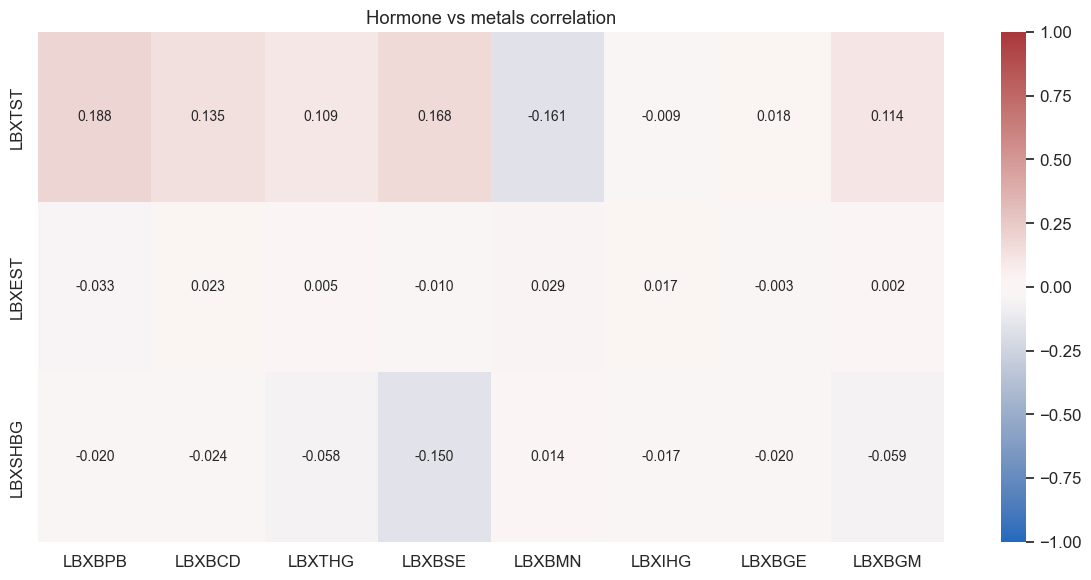

In [ ]:
metals = ["LBXBPB","LBXBCD","LBXTHG","LBXBSE","LBXBMN","LBXIHG","LBXBGE","LBXBGM"]
horms = ["LBXTST","LBXEST","LBXSHBG"]
corrs = df_12[metals+horms].corr().loc[horms, metals]

# Make the figure wider and taller
plt.figure(figsize=(12, 6))  # Width=12, Height=6 (adjust as needed)

sns.heatmap(corrs, annot=True, vmin=-1, vmax=1, cmap="vlag", 
            fmt='.3f',  # Format numbers to 3 decimal places
            annot_kws={'size': 10})  # Make annotation text larger

plt.title("Hormone vs metals correlation")
plt.tight_layout()  # Ensures everything fits nicely
plt.show()

In [ ]:
df_filtered['RIDEXPRG'].value_counts()

RIDEXPRG
300.0    2024
202.0     749
203.0     729
2.0       526
1.0        17
3.0        14
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Predictions
y_pred = results_dic['best_model'].predict(results_dic["X_test"])

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    "Original_LBXTST": results_dic["y_test"].values,
    "Predicted_LBXTST": y_pred
})

# Optional: round for readability
comparison_df = comparison_df.round(2)

# Show side by side
print(comparison_df)


     Original_LBXTST  Predicted_LBXTST
0              18.20         40.980000
1            1270.00        450.329987
2              15.30         15.520000
3              25.50         29.010000
4             588.00        448.829987
..               ...               ...
813            33.90         23.850000
814             5.61         16.030001
815            23.00         29.340000
816            11.20         32.369999
817           309.00        462.920013

[818 rows x 2 columns]


In [ ]:
comparison_df.head(50)

,Original_LBXTST,Predicted_LBXTST
0,18.20,40.980000
1,1270.00,450.329987
2,15.30,15.520000
3,25.50,29.010000
4,588.00,448.829987
5,15.90,23.530001
6,269.00,398.820007
7,386.00,369.609985
8,1.78,15.430000
9,38.40,26.150000


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Define model registry: model class + parameter grid
regressor_configs = {
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200,],
            "max_depth": [5, 10, None]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200, 500],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5, 7]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, verbosity=0),
        "param_grid": {
            "n_estimators": [10, 50, 200, 500, 1000],
            "learning_rate": [0.05, 0.1, 0.001],
            "max_depth": [3, 5, 7]
        }
    },
    "LightGBM": {
        "model": LGBMRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [200, 500],
            "learning_rate": [0.05, 0.1],
            "max_depth": [-1, 10, 3, 5]
        }
    },
    "CatBoost": {
        "model": CatBoostRegressor(random_state=42, silent=True),
        "param_grid": {
            "iterations": [200, 500,],
            "learning_rate": [0.05, 0.1],
            "depth": [7, 10, 3, 5]
        }
    }
}


all_model_results = []

for model_name, cfg in regressor_configs.items():
    print(f"\nRunning {model_name}...")
    current_result, results_dict = preprocess_and_model_shap(
        df=df_filtered,
        target_col="LBXEST",
        model=cfg["model"],
        param_grid=cfg["param_grid"],
        drop_cols=["SEQN", "DMDHRAGE"],
        run_shap=False,
        #external_results_path="all_results.csv",
    )
    
    all_model_results.append((model_name, current_result, results_dict))



Running RandomForest...

Running GradientBoosting...

Running XGBoost...

Running LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 3247, number of used features: 9
[LightGBM] [Info] Start training from score 49.035145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [ ]:
global_results_df

,Model,Best Params,MAE,MSE,RMSE,R2,Selected Features
0,XGBRegressor,"{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}",34.949970,31253.891986,176.787703,0.711349,"[RIDEXPRG, LBDBSESI, LBDTHGSI, LBDBCDSI, LBDBPBSI, RIDAGEMN, RHQ160, LBDBMNSI, RIAGENDR]"
1,XGBRegressor,"{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}",34.949970,31253.891986,176.787703,0.711349,"[RIDEXPRG, LBDBSESI, LBDTHGSI, LBDBCDSI, LBDBPBSI, RIDAGEMN, RHQ160, LBDBMNSI, RIAGENDR]"
2,XGBRegressor,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}",28.467306,2127.816642,46.128263,0.168204,"[RIDAGEMN, RIDEXPRG, LBDBMNSI, LBDBSESI, LBDBPBSI, LBDBCDSI, LBDTHGSI, RIAGENDR, RHQ160]"
3,XGBRegressor,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}",28.206171,2109.815688,45.932730,0.175241,"[RIDAGEMN, RIDEXPRG, LBDBMNSI, LBDBPBSI, INDFMPIR, LBDBSESI, LBDTHGSI, LBDBCDSI, RIAGENDR, RHQ160]"


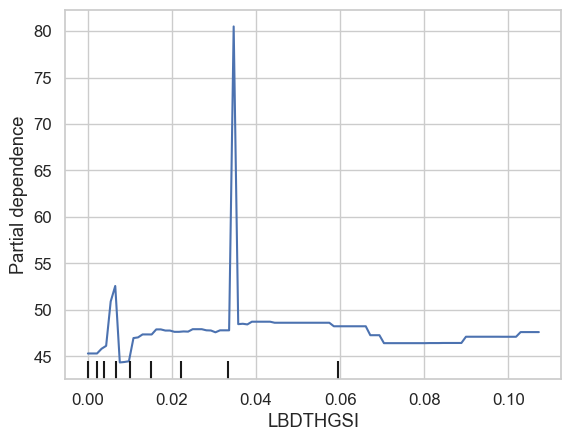

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Assume your model is sklearn-compatible (or wrapped)
features = ["LBDTHGSI"]
PartialDependenceDisplay.from_estimator(best_model, X_test_sel, features)
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1, random_state=42)
df["outlier"] = model.fit_predict(df[["value"]])

outliers = df[df["outlier"] == -1]
print("Outliers by Isolation Forest:\n", outliers)


In [ ]:
df_filtered.head(20)

,LBXTST,LBDBSESI,RIDEXPRG,LBDTHGSI,RHQ160,LBDBCDSI,LBDBPBSI,LBDBMNSI,RIDAGEMN,RIAGENDR,RHQ131
0,367.00,2.57,-300.0,2.3,-300.0,1.78,0.043,142.52,744.0,1,-300.0
1,505.00,2.53,-300.0,15.4,-300.0,31.41,0.126,130.69,636.0,1,-300.0
2,104.00,2.90,-300.0,3.5,-300.0,3.83,0.089,112.49,936.0,1,-300.0
3,19.50,2.47,202.0,2.3,NaN,1.25,0.024,228.80,132.0,2,NaN
4,543.00,2.42,-300.0,6.9,-300.0,1.78,0.035,132.33,264.0,1,-300.0
5,30.70,2.50,2.0,7.7,3.0,2.22,0.017,161.63,384.0,2,1.0
6,381.00,2.77,-300.0,21.5,-300.0,1.07,0.029,175.65,216.0,1,-300.0
7,685.00,2.61,-300.0,17.7,-300.0,2.76,0.095,61.89,672.0,1,-300.0
8,336.00,2.48,-300.0,2.7,-300.0,8.63,0.075,123.41,552.0,1,-300.0
9,20.90,2.22,202.0,1.0,NaN,1.87,0.009,276.85,192.0,2,NaN


In [ ]:
import joblib

# Load your trained model
model_path = "./models/LBXTST/xgboost_model_1.joblib"
loaded_model = joblib.load(model_path)

# Example new input (dummy values just for illustration)
new_data = pd.DataFrame([{
    'LBDBSESI': 2.42,
    'RIDEXPRG': 2.0,
    'LBDTHGSI': 16.1,
    'RHQ160': 504.0,
    'LBDBCDSI': 9.88,
    'LBDBPBSI': 0.087,
    'LBDBMNSI': 261.20,
    'RIDAGEMN': 288.0	,
    'RIAGENDR': 2
    # ⚠️ must include all selected features that your model expects
}])

# Reindex to ensure same columns order as training
new_data = new_data.reindex(columns=results_dic["selected_features"], fill_value=0)

# Predict
prediction = loaded_model.predict(new_data)
print("✅ Prediction for new input:", prediction[0])


✅ Prediction for new input: 185.96628


In [ ]:
def preprocess_domain_rules(df):
    df = df.copy()
    is_male = df["RIAGENDR"] == 1
    is_female = df["RIAGENDR"] == 2
    age = df["RIDAGEMN"]

    # RIDEXPRG logic
    df.loc[is_male, "RIDEXPRG"] = -1000
    df.loc[is_female & (age < 20), "RIDEXPRG"] = 202
    df.loc[is_female & (age > 44), "RIDEXPRG"] = 203

    # Replace NaNs in RHQ/RHD cols for males
    df = mark_male_nans(df)

    return df


In [ ]:
import mlflow
import mlflow.sklearn  # for sklearn models

def preprocess_and_model_mlflow(
    df,
    target_col,
    model,
    param_grid,
    drop_cols=None,
    test_size=0.2,
    random_state=42,
    top_features=60,
    run_shap=True,
    experiment_name="HormonePrediction"
):
    # Apply domain preprocessing rules
    df = preprocess_domain_rules(df)

    # Start an MLflow run
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run():
        # Run your pipeline
        current_result, results_dict = preprocess_and_model_shap(
            df=df,
            target_col=target_col,
            model=model,
            param_grid=param_grid,
            drop_cols=drop_cols,
            test_size=test_size,
            random_state=random_state,
            top_features=top_features,
            run_shap=run_shap,
        )

        # ---------------- Log params ----------------
        mlflow.log_params(results_dict["best_params"])
        mlflow.log_param("target_col", target_col)
        mlflow.log_param("selected_features", results_dict["selected_features"])

        # ---------------- Log metrics ----------------
        mlflow.log_metrics(results_dict["eval_results"])

        # ---------------- Log SHAP artifacts ----------------
        if run_shap:
            mlflow.log_artifacts("shap_outputs")

        # ---------------- Log model ----------------
        mlflow.sklearn.log_model(
            sk_model=results_dict["best_model"],
            artifact_path="model",
            registered_model_name="HormonePredictor"
        )

        print("✅ Run logged in MLflow")

    return current_result, results_dict


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid={
        "n_estimators": [20,50, 100, 500, 1000],
        "max_depth": [3, 5, 7, 12],
        "learning_rate": [0.05, 0.1, 0.001, 0.01]
    }

curr, res = preprocess_and_model_mlflow(
    df=df_filtered,
    target_col="LBXTST",   # example hormone level
    model=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid=param_grid
)


2025/08/18 23:30:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/18 23:30:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Run logged in MLflow


Registered model 'HormonePredictor' already exists. Creating a new version of this model...
Created version '2' of model 'HormonePredictor'.


In [ ]:
print(mlflow.get_tracking_uri())

file:///d:/UOM/Sem%2005/DS%20PROJECT/Project_notebooks/mlruns


In [ ]:
import mlflow
import mlflow.xgboost
import pandas as pd

input_example = res['X_test'][5:]
signature = mlflow.models.signature.infer_signature(X_test, preds)

mlflow.xgboost.log_model(
    xgb_model,
    artifact_path="model",
    input_example=input_example,
    signature=signature
)
